In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf

In [296]:
def Get_weighted_average(value,error):
    #Factor is 1, it's a ratio, so no need to convert unit
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        if error[i]==0:
            print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_propagation_sum(V1,E1,V2,E2):
    return math.sqrt(E1*E1+E2*E2)
def Get_propagation_diff(V1,E1,V2,E2):
    return math.sqrt(E1*E1+E2*E2)
def Get_propagation_divide(V1,E1,V2,E2):
    return V1/V2*math.sqrt((E1/V1)**2+(E2/V2)**2)


In [297]:
CT10nlo = lhapdf.mkPDF("CT10nlo",0)  #index 0 has best fit
CJ15lo = lhapdf.mkPDF("CJ15lo",0) #index 0 has best fit
CJ15nlo = lhapdf.mkPDF("CJ15nlo",0) #index 0 has best fit
# JAM20 = lhapdf.mkPDF("JAM20-SIDIS_PDF_proton_nlo",0) 
# CT10nlo = lhapdf.mkPDFs("CT10nlo")
# CJ15lo = lhapdf.mkPDFs("CJ15lo")
# CJ15nlo = lhapdf.mkPDFs("CJ15nlo")
JAM20_all = lhapdf.mkPDFs("JAM20-SIDIS_PDF_proton_nlo") #need find average for best fit
#g=0, d=1, u=2, s=3, c=4, b=5, db=-1, ub=-2, sb=-3, cb=-4, bb=-5

LHAPDF 6.5.5 loading /Users/zz81/miniconda3/share/LHAPDF/CT10nlo/CT10nlo_0000.dat
CT10nlo PDF set, member #0, version 4; LHAPDF ID = 11000
LHAPDF 6.5.5 loading /Users/zz81/miniconda3/share/LHAPDF/CJ15lo/CJ15lo_0000.dat
CJ15lo PDF set, member #0, version 2; LHAPDF ID = 12300
LHAPDF 6.5.5 loading /Users/zz81/miniconda3/share/LHAPDF/CJ15nlo/CJ15nlo_0000.dat
CJ15nlo PDF set, member #0, version 2; LHAPDF ID = 12400
LHAPDF 6.5.5 loading all 196 PDFs in set JAM20-SIDIS_PDF_proton_nlo
JAM20-SIDIS_PDF_proton_nlo, version 2; 196 PDF members


In [302]:
def get_ratios(pdf,x,Q2): 
    d  = pdf.xfxQ2(1,x,Q2)
    db = pdf.xfxQ2(-1,x,Q2) 
    u  = pdf.xfxQ2(2,x,Q2)
    ub = pdf.xfxQ2(-2,x,Q2) 
    Sum=(4*u+4*ub+d+db)/5/(u+ub+d+db)
    uv=u-ub
    dv=d-db
    Dif=(4*uv-dv)/3/(uv+dv)
    return [Sum,Dif]
def mcstat(pdfs,x,Q2):
    nreps=len(pdfs)
    data=np.zeros((nreps,2))
    for i in range(nreps):
        data[i]=get_ratios(pdfs[i],x,Q2)
        # if (i<3):
            # print('%i:sum=%0.2e diff=%0.2e'%(i,data[i][0],data[i][1]))
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    return mean,std

In [303]:
# this is to test how to use pdf
x=0.25; Q2=2.25
mean,std=mcstat(JAM20_all,x,Q2) # somehow JAM20 works also even though it is not defined
print('JAM20nlo: sum=%0.2e diff=%0.2e'%(mean[0],mean[1]))
# mean,std=mcstat(jam22,x,Q2)
# print('JAM22nlo: sum=%0.2e diff=%0.2e'%(mean[0],mean[1]))
# mean=get_ratios(CJ15nlo[0],x,Q2)
# print('CJ15nlo : sum=%0.2e diff=%0.2e'%(mean[0],mean[1]))
# mean=get_ratios(CT18nlo[0],x,Q2)
# print('CJ18nlo : sum=%0.2e diff=%0.2e'%(mean[0],mean[1]))

JAM20nlo: sum=5.93e-01 diff=8.67e-01


In [304]:
def mean_pdf(pdfs,parton,xbj,Q):
    nreps=len(pdfs)
    data=np.zeros((nreps,1))
    for i in range(nreps):
        data[i]=pdfs[i].xfxQ(parton,xbj,Q)
        # if (i<2):
            # print('%i:data=%0.2e'%(i,data[i][0]))
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    # print('mean=%0.2e'%(mean[0]))
    return mean,std
def Get_sum_ratio(xbj,Q,PDF_set):
    if(PDF_set==JAM20):
        u = mean_pdf(JAM20_all,2,xbj,Q)[0]
        d = mean_pdf(JAM20_all,1,xbj,Q)[0]
        ub = mean_pdf(JAM20_all,-2,xbj,Q)[0]
        db = mean_pdf(JAM20_all,-1,xbj,Q)[0]
    else:
        u = PDF_set.xfxQ(2,xbj,Q)
        d = PDF_set.xfxQ(1,xbj,Q)
        ub = PDF_set.xfxQ(-2,xbj,Q)
        db = PDF_set.xfxQ(-1,xbj,Q)
    sum_ratio = 2*(4*u+4*ub+d+db)/(5*(u+ub+d+db))
    return sum_ratio
def Get_diff_ratio(xbj,Q,PDF_set):
    if(PDF_set==JAM20):
        u = mean_pdf(JAM20_all,2,xbj,Q)[0]
        d = mean_pdf(JAM20_all,1,xbj,Q)[0]
        ub = mean_pdf(JAM20_all,-2,xbj,Q)[0]
        db = mean_pdf(JAM20_all,-1,xbj,Q)[0]
    else:
        u = PDF_set.xfxQ(2,xbj,Q)
        d = PDF_set.xfxQ(1,xbj,Q)
        ub = PDF_set.xfxQ(-2,xbj,Q)
        db = PDF_set.xfxQ(-1,xbj,Q)
    uv = u-ub
    dv = d-db
    # diff_raito = 2*(4*uv-dv)/(3*(uv+dv)) bug with wrong name
    diff_ratio = 2*(4*uv-dv)/(3*(uv+dv))
    return diff_ratio

In [305]:
df_pip_H2 = pd.read_csv('inputs/simenhanced_H2_pip_morez.csv',delim_whitespace=True)
df_pip_H2.head()

/var/folders/_m/_vxbh__j2yd7336fgb0kw1yh0000gq/T/ipykernel_76868/1386320706.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_pip_H2 = pd.read_csv('inputs/simenhanced_H2_pip_morez.csv',delim_whitespace=True)


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.133843,-2.484808,0.497512,0.312012,1.351763,0.070849,FUUT,0.259553,0.003171,0.0,0.0,proton,pi+,solid,0.003171
1,1,11.0,0.150131,0.667022,0.457086,0.312221,1.398448,0.064640,FUUT,0.262231,0.003161,0.0,0.0,proton,pi+,solid,0.003161
2,2,11.0,0.131244,2.722596,0.504786,0.312065,1.344239,0.071137,FUUT,0.258883,0.003871,0.0,0.0,proton,pi+,solid,0.003871
3,3,11.0,0.108182,-3.004300,0.582961,0.312056,1.277188,0.156854,FUUT,0.224843,0.003175,0.0,0.0,proton,pi+,solid,0.003175
4,4,11.0,0.109628,-2.727791,0.577285,0.312035,1.281337,0.157038,FUUT,0.225282,0.003191,0.0,0.0,proton,pi+,solid,0.003191


In [306]:
df_pim_H2 = pd.read_csv('inputs/simenhanced_H2_pim_morez.csv',delim_whitespace=True)
df_pim_H2.head()

/var/folders/_m/_vxbh__j2yd7336fgb0kw1yh0000gq/T/ipykernel_76868/2024400937.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_pim_H2 = pd.read_csv('inputs/simenhanced_H2_pim_morez.csv',delim_whitespace=True)


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0.0,11.0,0.140931,-1.859228,0.480518,0.312185,1.371638,0.067666,FUUT,0.171410,0.003169,0.0,0.0,proton,pi-,solid,0.003169
1,1.0,11.0,0.135466,2.342318,0.493522,0.312035,1.356932,0.070695,FUUT,0.172357,0.003542,0.0,0.0,proton,pi-,solid,0.003542
2,2.0,11.0,0.107826,-2.943341,0.58419,0.312007,1.275753,0.157218,FUUT,0.155365,0.003170,0.0,0.0,proton,pi-,solid,0.003170
3,3.0,11.0,0.110737,-2.535484,0.572054,0.311947,1.282470,0.157542,FUUT,0.155670,0.003147,0.0,0.0,proton,pi-,solid,0.003147
4,4.0,11.0,0.118690,-2.079973,0.543284,0.311992,1.304463,0.158406,FUUT,0.155227,0.003142,0.0,0.0,proton,pi-,solid,0.003142


In [307]:
df_pip_D2 = pd.read_csv('inputs/simenhanced_D2_pip_morez.csv',delim_whitespace=True)
df_pip_D2.head()


/var/folders/_m/_vxbh__j2yd7336fgb0kw1yh0000gq/T/ipykernel_76868/264115675.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_pip_D2 = pd.read_csv('inputs/simenhanced_D2_pip_morez.csv',delim_whitespace=True)


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.142153,-1.425072,0.476983,0.312118,1.375214,0.067380,FUUT,0.228365,0.001828,0.0,0.0,deuteron,pi+,solid,0.001828
1,1,11.0,0.132869,2.513670,0.499833,0.312056,1.348215,0.071054,FUUT,0.229433,0.002426,0.0,0.0,deuteron,pi+,solid,0.002426
2,2,11.0,0.108179,-2.913162,0.582535,0.312002,1.276223,0.157047,FUUT,0.203311,0.001837,0.0,0.0,deuteron,pi+,solid,0.001837
3,3,11.0,0.112408,-2.440601,0.565975,0.312072,1.287278,0.157724,FUUT,0.203702,0.001829,0.0,0.0,deuteron,pi+,solid,0.001829
4,4,11.0,0.124542,-1.882419,0.524942,0.312015,1.322315,0.158923,FUUT,0.204020,0.001826,0.0,0.0,deuteron,pi+,solid,0.001826


In [308]:
df_pim_D2 = pd.read_csv('inputs/simenhanced_D2_pim_morez.csv',delim_whitespace=True)
df_pim_D2.head()


/var/folders/_m/_vxbh__j2yd7336fgb0kw1yh0000gq/T/ipykernel_76868/2453953394.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_pim_D2 = pd.read_csv('inputs/simenhanced_D2_pim_morez.csv',delim_whitespace=True)


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.140284,-0.538152,0.481653,0.312081,1.370446,0.068456,FUUT,0.170529,0.001823,0.0,0.0,deuteron,pi-,solid,0.001823
1,1,11.0,0.128988,2.889779,0.510868,0.311970,1.336990,0.071599,FUUT,0.172687,0.004247,0.0,0.0,deuteron,pi-,solid,0.004247
2,2,11.0,0.108377,-2.840502,0.581337,0.312003,1.276068,0.157155,FUUT,0.155469,0.001822,0.0,0.0,deuteron,pi-,solid,0.001822
3,3,11.0,0.116478,-2.193055,0.551204,0.312002,1.298351,0.158329,FUUT,0.154859,0.001812,0.0,0.0,deuteron,pi-,solid,0.001812
4,4,11.0,0.139629,-0.055349,0.483188,0.312008,1.366982,0.158737,FUUT,0.151796,0.001830,0.0,0.0,deuteron,pi-,solid,0.001830


In [309]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.35,0.4,0.45,0.5,0.55,0.6]
#z_cuts=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.7]
z_cuts=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[3,3.5,4,4.5,5]
xbj_cuts=[0,0.25,0.5,0.7]

PhT_cuts=[0,0.1,0.2,0.3,0.4,0.5]

#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
Ebeam = 11
df_pip_H2_11 = df_pip_H2[(df_pip_H2['Ebeam']==Ebeam)]
df_pim_H2_11 = df_pim_H2[(df_pim_H2['Ebeam']==Ebeam)]
df_pip_D2_11 = df_pip_D2[(df_pip_D2['Ebeam']==Ebeam)]
df_pim_D2_11 = df_pim_D2[(df_pim_D2['Ebeam']==Ebeam)]
df_pip_H2_11.head()

3.141592653589793


,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.133843,-2.484808,0.497512,0.312012,1.351763,0.070849,FUUT,0.259553,0.003171,0.0,0.0,proton,pi+,solid,0.003171
1,1,11.0,0.150131,0.667022,0.457086,0.312221,1.398448,0.064640,FUUT,0.262231,0.003161,0.0,0.0,proton,pi+,solid,0.003161
2,2,11.0,0.131244,2.722596,0.504786,0.312065,1.344239,0.071137,FUUT,0.258883,0.003871,0.0,0.0,proton,pi+,solid,0.003871
3,3,11.0,0.108182,-3.004300,0.582961,0.312056,1.277188,0.156854,FUUT,0.224843,0.003175,0.0,0.0,proton,pi+,solid,0.003175
4,4,11.0,0.109628,-2.727791,0.577285,0.312035,1.281337,0.157038,FUUT,0.225282,0.003191,0.0,0.0,proton,pi+,solid,0.003191


In [310]:
xl = xbj_cuts[0]
xr = xbj_cuts[2]
Q2l = Q2_cuts[2]
Q2r = Q2_cuts[3]

zl = z_cuts[0]
zr = z_cuts[-1]
PhTl = PhT_cuts[0]
PhTr = PhT_cuts[1]
print('x cuts: ',xl,' to ',xr,' Q2 cuts: ',Q2l,' to ',Q2r,' z range ',zl,' to ',zr,' PhT cut ',PhTl,' to ',PhTr)

x cuts:  0  to  0.5  Q2 cuts:  2  to  2.5  z range  0.3  to  0.6  PhT cut  0  to  0.1


In [311]:
df_pip_H2_11_cuts = df_pip_H2_11[(df_pip_H2_11['x']>xl)&(df_pip_H2_11['x']<xr)&(df_pip_H2_11['Q2']>Q2l)&(df_pip_H2_11['Q2']<Q2r)&(df_pip_H2_11['z']>zl)&(df_pip_H2_11['z']<zr)&(df_pip_H2_11['pT']>PhTl)&(df_pip_H2_11['pT']<PhTr)]
print(len(df_pip_H2_11_cuts))
print(df_pip_H2_11_cuts)
df_pim_H2_11_cuts = df_pim_H2_11[(df_pim_H2_11['x']>xl)&(df_pim_H2_11['x']<xr)&(df_pim_H2_11['Q2']>Q2l)&(df_pim_H2_11['Q2']<Q2r)&(df_pim_H2_11['z']>zl)&(df_pim_H2_11['z']<zr)&(df_pim_H2_11['pT']>PhTl)&(df_pim_H2_11['pT']<PhTr)]
print(df_pim_H2_11_cuts)

47
         i  Ebeam         x      phih         y         z        Q2        pT  \
1063  1063   11.0  0.202429 -2.650153  0.539127  0.312103  2.221764  0.067582   
1064  1064   11.0  0.213647 -1.562704  0.506135  0.312053  2.211078  0.066529   
1065  1065   11.0  0.224149  0.325591  0.478135  0.312262  2.201668  0.060886   
1066  1066   11.0  0.209342  1.922081  0.518114  0.312041  2.213349  0.067708   
1067  1067   11.0  0.201171  2.799506  0.542848  0.312102  2.222670  0.067678   
1068  1068   11.0  0.279074 -1.073068  0.396075  0.312105  2.269326  0.065384   
1069  1069   11.0  0.284907  0.600889  0.385594  0.312025  2.255189  0.068393   
1070  1070   11.0  0.263902  2.099666  0.425630  0.312224  2.316154  0.055341   
1129  1129   11.0  0.204067 -2.529288  0.533909  0.337059  2.219028  0.067610   
1130  1130   11.0  0.218963 -1.042141  0.491679  0.337189  2.205951  0.064008   
1131  1131   11.0  0.217269  1.223701  0.496339  0.337123  2.207815  0.064869   
1132  1132   11.0  0.2036

TypeError: '>' not supported between instances of 'str' and 'float'

In [312]:
df_pip_D2_11_cuts = df_pip_D2_11[(df_pip_D2_11['x']>xl)&(df_pip_D2_11['x']<xr)&(df_pip_D2_11['Q2']>Q2l)&(df_pip_D2_11['Q2']<Q2r)&(df_pip_D2_11['z']>zl)&(df_pip_D2_11['z']<zr)&(df_pip_D2_11['pT']>PhTl)&(df_pip_D2_11['pT']<PhTr)]
#print(len(df_pip_D2_11_cuts))
#print(df_pip_D2_11_cuts)
df_pim_D2_11_cuts = df_pim_D2_11[(df_pim_D2_11['x']>xl)&(df_pim_D2_11['x']<xr)&(df_pim_D2_11['Q2']>Q2l)&(df_pim_D2_11['Q2']<Q2r)&(df_pim_D2_11['z']>zl)&(df_pim_D2_11['z']<zr)&(df_pim_D2_11['pT']>PhTl)&(df_pim_D2_11['pT']<PhTr)]
print(df_pim_D2_11_cuts)

       i  Ebeam         x      phih         y         z        Q2        pT  \
475  475   11.0  0.210628 -1.808149  0.515458  0.312079  2.213322  0.065731   
476  476   11.0  0.209790  1.910187  0.517539  0.312136  2.213825  0.066240   
477  477   11.0  0.279444  0.002208  0.395307  0.312053  2.267555  0.065592   
504  504   11.0  0.212995 -1.293833  0.508369  0.337089  2.210518  0.065229   
505  505   11.0  0.206051  2.258768  0.527669  0.337061  2.215937  0.067532   
506  506   11.0  0.278851 -0.006184  0.396238  0.337076  2.268647  0.065848   
529  529   11.0  0.213072 -0.748235  0.507862  0.362068  2.210371  0.065649   
530  530   11.0  0.203731  2.606213  0.534768  0.362031  2.219607  0.067711   
531  531   11.0  0.278058  0.000166  0.397445  0.362013  2.269676  0.066169   
552  552   11.0  0.211691 -0.139742  0.511641  0.387073  2.211343  0.066005   
553  553   11.0  0.202746  3.030610  0.537593  0.387030  2.220154  0.067603   
554  554   11.0  0.277219  0.000910  0.398845  0.387

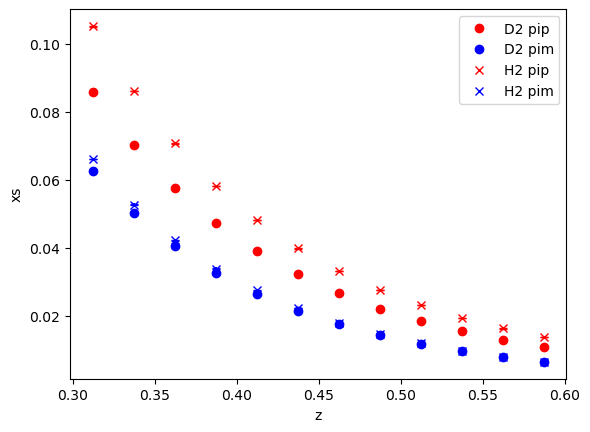

In [313]:
fig = plt.figure()
ax = fig.add_subplot()
z_D2_pip_bin = []
xs_D2_pip_bin = []
z_D2_pim_bin = []
xs_D2_pim_bin = []
z_H2_pip_bin = []
xs_H2_pip_bin = []
z_H2_pim_bin = []
xs_H2_pim_bin = []
for i_z in range(0,len(z_cuts)-1):
    zil = z_cuts[i_z]
    zir = z_cuts[i_z+1]
    zs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['z'].to_list()
    errs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['stat'].to_list()
    xss_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['value'].to_list()
    try:
        z_D2_pip = Get_weighted_average(zs_D2_pip,errs_D2_pip)[0]
        err_D2_pip = Get_weighted_average(zs_D2_pip,errs_D2_pip)[1]
        xs_D2_pip = Get_weighted_average(xss_D2_pip,errs_D2_pip)[0]
    except ZeroDivisionError as err:
        print("z",z_cuts[i_z])
    z_D2_pip_bin.append(z_D2_pip)
    xs_D2_pip_bin.append(xs_D2_pip)
    #print('weighted: ',z_D2_pip,' lists: ',zs_D2_pip)
    zs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['z'].to_list()
    errs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['stat'].to_list()
    xss_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['value'].to_list()
    try:
        z_D2_pim = Get_weighted_average(zs_D2_pim,errs_D2_pim)[0]
        err_D2_pim = Get_weighted_average(zs_D2_pim,errs_D2_pim)[1]
        xs_D2_pim = Get_weighted_average(xss_D2_pim,errs_D2_pim)[0]
    except ZeroDivisionError as err:
        print("D2 pim",z_cuts[i_z])
    z_D2_pim_bin.append(z_D2_pim)
    xs_D2_pim_bin.append(xs_D2_pim)
    zs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['value'].to_list()
    try:
        z_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[0]
        err_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[1]
        xs_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]
    except ZeroDivisionError as err:
        print("H2 pip",z_cuts[i_z])
    z_H2_pip_bin.append(z_H2_pip)
    xs_H2_pip_bin.append(xs_H2_pip)
    #print('weighted: ',z_H2_pip,' lists: ',zs_H2_pip)
    zs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['value'].to_list()
    try:
        z_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[0]
        err_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[1]
        xs_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]
    except ZeroDivisionError as err:
        print("H2 pim",z_cuts[i_z])
    z_H2_pim_bin.append(z_H2_pim)
    xs_H2_pim_bin.append(xs_H2_pim)
    #plt.plot(z_D2_pip,xs_D2_pip,'bo')
    ax.plot([z_D2_pip,z_D2_pip],[xs_D2_pip-xs_D2_pip*err_D2_pip,xs_D2_pip+xs_D2_pip*err_D2_pip],color = 'red',marker = '_')
    ax.plot([z_D2_pim,z_D2_pim],[xs_D2_pim-xs_D2_pim*err_D2_pim,xs_D2_pim+xs_D2_pim*err_D2_pim],color = 'blue',marker = '_')
    ax.plot([z_H2_pip,z_H2_pip],[xs_H2_pip-xs_H2_pip*err_H2_pip,xs_H2_pip+xs_H2_pip*err_H2_pip],color = 'red',marker = '_')
    ax.plot([z_H2_pim,z_H2_pim],[xs_H2_pim-xs_H2_pim*err_H2_pim,xs_H2_pim+xs_H2_pim*err_H2_pim],color = 'blue',marker = '_')
plt.plot(z_D2_pip_bin,xs_D2_pip_bin,'ro',label='D2 pip')
plt.plot(z_D2_pim_bin,xs_D2_pim_bin,'bo',label='D2 pim')
plt.plot(z_H2_pip_bin,xs_H2_pip_bin,'rx',label='H2 pip')
plt.plot(z_H2_pim_bin,xs_H2_pim_bin,'bx',label='H2 pim')     
plt.legend()
plt.xlabel('z')
plt.ylabel('xs')

plt.savefig('results/d_xs.pdf')

z:  0.31208622409263487  xbj : 0.23186825888528753  Q2:  2.2304365286293035
1.1531623437160075 1.162068951126299 1.167197744949168 1.1755985454522195 [1.17436685]
z:  0.3370762967137672  xbj : 0.23158110828947112  Q2:  2.2299145488524457
1.1528532452648135 1.1618657691626175 1.1670044181523067 1.1753763997001474 [1.17417847]
z:  0.3620651068523569  xbj : 0.2312885390367328  Q2:  2.229701107748635
1.1513584219763762 1.1616602537175187 1.166808664418448 1.175151617548125 [1.17398778]
z:  0.387075446338316  xbj : 0.2311097351539845  Q2:  2.2295754939046297
1.1521383436132095 1.161534581132459 1.166688921247892 1.1750142265756076 [1.17387118]
z:  0.4120941145117287  xbj : 0.2310623881064075  Q2:  2.2293114949508213
1.1547800027948967 1.1615000571568632 1.1666561169991618 1.1749766506526886 [1.17383928]
z:  0.43703938560116756  xbj : 0.23072296965877268  Q2:  2.228915620248378
1.1549471740758541 1.1612604156313793 1.1664277530446816 1.1747149372269066 [1.17361705]
z:  0.4621066249440061  xb

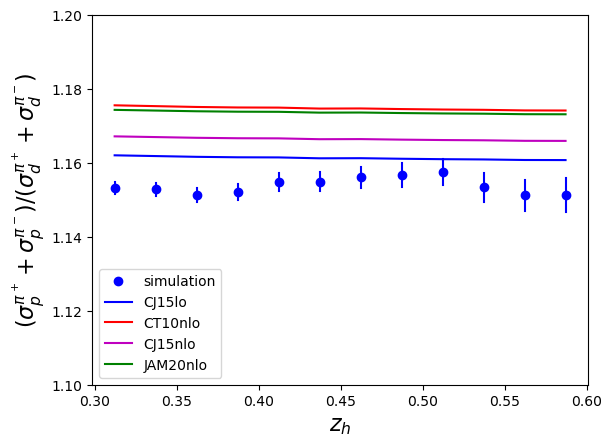

In [314]:
fig = plt.figure()
ax = fig.add_subplot()
z_sum_bin = []
xs_sum_bin = []
sum_ratio_bins_CJ15lo = []
sum_ratio_bins_CT10nlo = []
sum_ratio_bins_CJ15nlo = []
sum_ratio_bins_JAM20 = []
for i_z in range(0,len(z_cuts)-1):
    zil = z_cuts[i_z]
    zir = z_cuts[i_z+1]
    zs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['z'].to_list()
    errs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['stat'].to_list()
    xss_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['value'].to_list()
    z_D2_pip = Get_weighted_average(zs_D2_pip,errs_D2_pip)[0]
    xs_D2_pip = Get_weighted_average(xss_D2_pip,errs_D2_pip)[0]
    err_D2_pip = Get_weighted_average(xss_D2_pip,errs_D2_pip)[0]*Get_weighted_average(xss_D2_pip,errs_D2_pip)[1]
    xbjs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_D2_pip = Get_weighted_average(xbjs_D2_pip,errs_D2_pip)[0]
    Q2_D2_pip = Get_weighted_average(Q2s_D2_pip,errs_D2_pip)[0]
    
    #print('weighted: ',z_D2_pip,' lists: ',zs_D2_pip)
    zs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['z'].to_list()
    errs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['stat'].to_list()
    xss_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['value'].to_list()
    z_D2_pim = Get_weighted_average(zs_D2_pim,errs_D2_pim)[0]
    xs_D2_pim = Get_weighted_average(xss_D2_pim,errs_D2_pim)[0]
    err_D2_pim = Get_weighted_average(xss_D2_pim,errs_D2_pim)[0]*Get_weighted_average(xss_D2_pim,errs_D2_pim)[1]
    xbjs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_D2_pim = Get_weighted_average(xbjs_D2_pim,errs_D2_pim)[0]
    Q2_D2_pim = Get_weighted_average(Q2s_D2_pim,errs_D2_pim)[0]

    zs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[0]
    xs_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]
    err_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]*Get_weighted_average(xss_H2_pip,errs_H2_pip)[1]
    xbjs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pip = Get_weighted_average(xbjs_H2_pip,errs_H2_pip)[0]
    Q2_H2_pip = Get_weighted_average(Q2s_H2_pip,errs_H2_pip)[0]

    #print('weighted: ',z_H2_pip,' lists: ',zs_H2_pip)
    zs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[0]
    xs_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]
    err_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]*Get_weighted_average(xss_H2_pim,errs_H2_pim)[1]
    xbjs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pim = Get_weighted_average(xbjs_H2_pim,errs_H2_pim)[0]
    Q2_H2_pim = Get_weighted_average(Q2s_H2_pim,errs_H2_pim)[0]

    z_sum = Get_weighted_average([z_D2_pip,z_D2_pim,z_H2_pip,z_H2_pim],[err_D2_pip,err_D2_pim,err_H2_pip,err_H2_pim])[0]
    z_sum_bin.append(z_sum)
    #plt.plot(z_D2_pip,xs_D2_pip,'bo')
    sum_H2 = xs_H2_pip+xs_H2_pim
    sum_D2 = xs_D2_pip+xs_D2_pim
    sum_H2_err = Get_propagation_sum(xs_H2_pip,err_H2_pip,xs_H2_pim,err_H2_pim)
    sum_D2_err = Get_propagation_sum(xs_D2_pip,err_D2_pip,xs_D2_pim,err_D2_pim)
    sum_ratio = sum_H2/(sum_D2)
    sum_ratio_err = Get_propagation_divide(sum_H2,sum_H2_err,sum_D2,sum_D2_err)
    xs_sum_bin.append(sum_ratio)
    ax.plot([z_sum,z_sum],[sum_ratio-sum_ratio_err,sum_ratio+sum_ratio_err],'b')
    
    #xbj_sum = (xbj_D2_pip+xbj_D2_pim+xbj_H2_pip+xbj_H2_pim)/4
    #Q2_sum = (Q2_D2_pip+Q2_D2_pim+Q2_H2_pip+Q2_H2_pim)/4
    xbj_sum = Get_weighted_average([xbj_D2_pip,xbj_D2_pim,xbj_H2_pip,xbj_H2_pim],[err_D2_pip,err_D2_pim,err_H2_pip,err_H2_pim])[0]
    Q2_sum = Get_weighted_average([Q2_D2_pip,Q2_D2_pim,Q2_H2_pip,Q2_H2_pim],[err_D2_pip,err_D2_pim,err_H2_pip,err_H2_pim])[0]
    print('z: ',z_sum,' xbj :',xbj_sum,' Q2: ', Q2_sum)
    sum_ratio_CJ15lo = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),CJ15lo)
    sum_ratio_CT10nlo = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),CT10nlo)
    sum_ratio_bins_CJ15lo.append(sum_ratio_CJ15lo)
    sum_ratio_bins_CT10nlo.append(sum_ratio_CT10nlo)
    sum_ratio_CJ15nlo = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),CJ15nlo)
    # mean,std=mcstat(JAM20_all,xbj_sum,Q2_sum) # calculate first, then mean
    # sum_ratio_JAM20 = mean[0]*2 # calculate first, then mean
    sum_ratio_JAM20 = Get_sum_ratio(xbj_sum,math.sqrt(Q2_sum),JAM20)
    sum_ratio_bins_CJ15nlo.append(sum_ratio_CJ15nlo)
    sum_ratio_bins_JAM20.append(sum_ratio_JAM20)
    print(sum_ratio,sum_ratio_CJ15lo,sum_ratio_CJ15nlo,sum_ratio_CT10nlo,sum_ratio_JAM20)
plt.plot(z_sum_bin,xs_sum_bin,'bo',label='simulation') 
plt.plot(z_sum_bin,sum_ratio_bins_CJ15lo,'b',label='CJ15lo')
plt.plot(z_sum_bin,sum_ratio_bins_CT10nlo,'r',label='CT10nlo')
plt.plot(z_sum_bin,sum_ratio_bins_CJ15nlo,'m',label='CJ15nlo')
plt.plot(z_sum_bin,sum_ratio_bins_JAM20,'g',label='JAM20nlo')

plt.ylim(1.1,1.2)
# plt.ylim(0,1.2)
plt.legend()
plt.xlabel(r'$z_h$',fontsize=16)
# plt.ylabel('${(\sigma_{H_2}^{\pi^+}+\sigma_{H_2}^{\pi^-})}/{(\sigma_{D_2}^{\pi^+}+\sigma_{D_2}^{\pi^-})}$',fontsize=16)
plt.ylabel('${(\sigma_{p}^{\pi^+}+\sigma_{p}^{\pi^-})}/{(\sigma_{d}^{\pi^+}+\sigma_{d}^{\pi^-})}$',fontsize=16)

plt.savefig('results/d_sum_ratio.pdf')

z:  0.31208622409263487  xbj : 0.23186825888528753  Q2:  2.2304365286293035
1.6836181748389145 1.5992138216553584 1.6100949978282075 1.6347152096919586 [1.71653075]
z:  0.3370762967137672  xbj : 0.23158110828947112  Q2:  2.2299145488524457
1.6823214965597861 1.5989060332687766 1.6099268921442293 1.6344566365443949 [1.71626577]
z:  0.3620651068523569  xbj : 0.2312885390367328  Q2:  2.229701107748635
1.6774116502387852 1.598596109001173 1.609757978866598 1.6341961631532322 [1.71599813]
z:  0.387075446338316  xbj : 0.2311097351539845  Q2:  2.2295754939046297
1.6724941534568516 1.598406625632272 1.6096547569896795 1.6340370663377104 [1.71583451]
z:  0.4120941145117287  xbj : 0.2310623881064075  Q2:  2.2293114949508213
1.6414034105323747 1.5983535758582132 1.609625673133826 1.6339928528251535 [1.71578934]
z:  0.43703938560116756  xbj : 0.23072296965877268  Q2:  2.228915620248378
1.6354268004873425 1.5979916031990655 1.6094284645683015 1.6336895381648475 [1.71547727]
z:  0.4621066249440061  

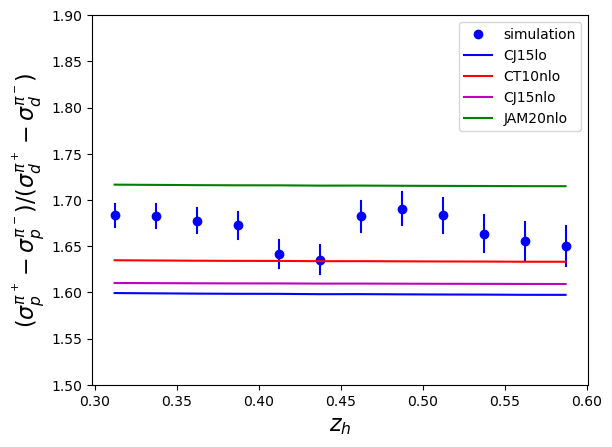

In [315]:
fig = plt.figure()
ax = fig.add_subplot()
z_diff_bin = []
xs_diff_bin = []
diff_ratio_bins_CJ15lo = []
diff_ratio_bins_CT10nlo = []
diff_ratio_bins_CJ15nlo = []
diff_ratio_bins_JAM20 = []
for i_z in range(0,len(z_cuts)-1):
    zil = z_cuts[i_z]
    zir = z_cuts[i_z+1]
    zs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['z'].to_list()
    errs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['stat'].to_list()
    xss_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['value'].to_list()
    z_D2_pip = Get_weighted_average(zs_D2_pip,errs_D2_pip)[0]
    xs_D2_pip = Get_weighted_average(xss_D2_pip,errs_D2_pip)[0]
    err_D2_pip = Get_weighted_average(xss_D2_pip,errs_D2_pip)[0]*Get_weighted_average(xss_D2_pip,errs_D2_pip)[1]
    xbjs_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_D2_pip = df_pip_D2_11_cuts[(df_pip_D2_11_cuts['z']>zil)&(df_pip_D2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_D2_pip = Get_weighted_average(xbjs_D2_pip,errs_D2_pip)[0]
    Q2_D2_pip = Get_weighted_average(Q2s_D2_pip,errs_D2_pip)[0]
    
    #print('weighted: ',z_D2_pip,' lists: ',zs_D2_pip)
    zs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['z'].to_list()
    errs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['stat'].to_list()
    xss_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['value'].to_list()
    z_D2_pim = Get_weighted_average(zs_D2_pim,errs_D2_pim)[0]
    xs_D2_pim = Get_weighted_average(xss_D2_pim,errs_D2_pim)[0]
    err_D2_pim = Get_weighted_average(xss_D2_pim,errs_D2_pim)[0]*Get_weighted_average(xss_D2_pim,errs_D2_pim)[1]
    xbjs_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_D2_pim = df_pim_D2_11_cuts[(df_pim_D2_11_cuts['z']>zil)&(df_pim_D2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_D2_pim = Get_weighted_average(xbjs_D2_pim,errs_D2_pim)[0]
    Q2_D2_pim = Get_weighted_average(Q2s_D2_pim,errs_D2_pim)[0]

    zs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pip = Get_weighted_average(zs_H2_pip,errs_H2_pip)[0]
    xs_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]
    err_H2_pip = Get_weighted_average(xss_H2_pip,errs_H2_pip)[0]*Get_weighted_average(xss_H2_pip,errs_H2_pip)[1]
    xbjs_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pip = df_pip_H2_11_cuts[(df_pip_H2_11_cuts['z']>zil)&(df_pip_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pip = Get_weighted_average(xbjs_H2_pip,errs_H2_pip)[0]
    Q2_H2_pip = Get_weighted_average(Q2s_H2_pip,errs_H2_pip)[0]

    #print('weighted: ',z_H2_pip,' lists: ',zs_H2_pip)
    zs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['z'].to_list()
    errs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['stat'].to_list()
    xss_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['value'].to_list()
    z_H2_pim = Get_weighted_average(zs_H2_pim,errs_H2_pim)[0]
    xs_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]
    err_H2_pim = Get_weighted_average(xss_H2_pim,errs_H2_pim)[0]*Get_weighted_average(xss_H2_pim,errs_H2_pim)[1]
    xbjs_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['x'].to_list()
    Q2s_H2_pim = df_pim_H2_11_cuts[(df_pim_H2_11_cuts['z']>zil)&(df_pim_H2_11_cuts['z']<zir)]['Q2'].to_list()
    xbj_H2_pim = Get_weighted_average(xbjs_H2_pim,errs_H2_pim)[0]
    Q2_H2_pim = Get_weighted_average(Q2s_H2_pim,errs_H2_pim)[0]

    z_diff = Get_weighted_average([z_D2_pip,z_D2_pim,z_H2_pip,z_H2_pim],[err_D2_pip,err_D2_pim,err_H2_pip,err_H2_pim])[0]
    z_diff_bin.append(z_diff)
    #plt.plot(z_D2_pip,xs_D2_pip,'bo')
    diff_H2 = xs_H2_pip-xs_H2_pim
    diff_D2 = xs_D2_pip-xs_D2_pim
    diff_H2_err = Get_propagation_diff(xs_H2_pip,err_H2_pip,xs_H2_pim,err_H2_pim)
    diff_D2_err = Get_propagation_diff(xs_D2_pip,err_D2_pip,xs_D2_pim,err_D2_pim)
    diff_ratio = diff_H2/(diff_D2)
    diff_ratio_err = Get_propagation_divide(diff_H2,diff_H2_err,diff_D2,diff_D2_err)
    xs_diff_bin.append(diff_ratio)
    ax.plot([z_diff,z_diff],[diff_ratio-diff_ratio_err,diff_ratio+diff_ratio_err],'b')
    
    #xbj_diff = (xbj_D2_pip+xbj_D2_pim+xbj_H2_pip+xbj_H2_pim)/4
    #Q2_diff = (Q2_D2_pip+Q2_D2_pim+Q2_H2_pip+Q2_H2_pim)/4
    xbj_diff = Get_weighted_average([xbj_D2_pip,xbj_D2_pim,xbj_H2_pip,xbj_H2_pim],[err_D2_pip,err_D2_pim,err_H2_pip,err_H2_pim])[0]
    Q2_diff = Get_weighted_average([Q2_D2_pip,Q2_D2_pim,Q2_H2_pip,Q2_H2_pim],[err_D2_pip,err_D2_pim,err_H2_pip,err_H2_pim])[0]
    print('z: ',z_diff,' xbj :',xbj_diff,' Q2: ', Q2_diff)
    diff_ratio_CJ15lo = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),CJ15lo)
    diff_ratio_CT10nlo = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),CT10nlo)
    diff_ratio_bins_CJ15lo.append(diff_ratio_CJ15lo)
    diff_ratio_bins_CT10nlo.append(diff_ratio_CT10nlo)
    diff_ratio_CJ15nlo = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),CJ15nlo)
    # mean,std=mcstat(JAM20_all,xbj_diff,Q2_diff)  # calculate first, then mean
    # diff_ratio_JAM20 = mean[1]*2 # calculate first, then mean
    diff_ratio_JAM20 = Get_diff_ratio(xbj_diff,math.sqrt(Q2_diff),JAM20)
    diff_ratio_bins_CJ15nlo.append(diff_ratio_CJ15nlo)
    diff_ratio_bins_JAM20.append(diff_ratio_JAM20)
    print(diff_ratio,diff_ratio_CJ15lo,diff_ratio_CJ15nlo,diff_ratio_CT10nlo,diff_ratio_JAM20)
plt.plot(z_diff_bin,xs_diff_bin,'bo',label='simulation') 
plt.plot(z_diff_bin,diff_ratio_bins_CJ15lo,'b',label='CJ15lo')
plt.plot(z_diff_bin,diff_ratio_bins_CT10nlo,'r',label='CT10nlo')
plt.plot(z_diff_bin,diff_ratio_bins_CJ15nlo,'m',label='CJ15nlo')
plt.plot(z_diff_bin,diff_ratio_bins_JAM20,'g',label='JAM20nlo')

plt.ylim(1.5,1.9)
plt.legend()
plt.xlabel(r'$z_h$',fontsize=16)
# plt.ylabel('${(\sigma_{H_2}^{\pi^+}-\sigma_{H_2}^{\pi^-})}/{(\sigma_{D_2}^{\pi^+}-\sigma_{D_2}^{\pi^-})}$',fontsize=16)
plt.ylabel('${(\sigma_{p}^{\pi^+}-\sigma_{p}^{\pi^-})}/{(\sigma_{d}^{\pi^+}-\sigma_{d}^{\pi^-})}$',fontsize=16)

plt.savefig('results/d_diff_ratio.pdf')